<a href="https://colab.research.google.com/github/soham1111-jod/deepfake-detection-model/blob/main/Copy_of_deepfake_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
import zipfile
import os

# Mount Google Drive
drive.mount('/content/drive')

# Path to archive.zip in Google Drive
zip_path = "/content/drive/MyDrive/archive.zip"
extract_path = "/content/dataset"  # Extract directly into /content/dataset

# Step 1: Check if archive.zip exists
if os.path.exists(zip_path):
    print("✅ Found archive.zip. Extracting now...")

    # Step 2: Extract archive.zip
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

    print("✅ Extraction successful!")
    print("Extracted files:", os.listdir(extract_path))

else:
    print("❌ Error: archive.zip not found in Google Drive! Check the file location.")


Mounted at /content/drive
✅ Found archive.zip. Extracting now...
✅ Extraction successful!
Extracted files: ['1000_videos']


In [4]:
import os

dataset_path = "/content/dataset/1000_videos"
print("Files and folders inside dataset:", os.listdir(dataset_path))


Files and folders inside dataset: ['Fake', 'Real']


In [5]:
import os

real_path = "/content/dataset/1000_videos/Real"
fake_path = "/content/dataset/1000_videos/Fake"

num_real = len(os.listdir(real_path))
num_fake = len(os.listdir(fake_path))

print(f"📸 Real images: {num_real}")
print(f"🎭 Fake images: {num_fake}")


📸 Real images: 8005
🎭 Fake images: 8428


In [6]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [7]:
import os

zip_path = "/content/drive/MyDrive/archive.zip"

if os.path.exists(zip_path):
    print("✅ archive.zip found!")
else:
    print("❌ archive.zip NOT found! Check file path.")


✅ archive.zip found!


In [8]:
import zipfile

extract_path = "/content/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Extraction complete! Extracted files:", os.listdir(extract_path))


✅ Extraction complete! Extracted files: ['1000_videos']


In [9]:
print("Files and folders inside dataset:", os.listdir("/content/dataset"))


Files and folders inside dataset: ['1000_videos']


In [10]:
import shutil
import os

# Define paths
source_folder = "/content/dataset/1000_videos"
destination_folder = "/content/dataset"

# Move all files & folders inside "1000_videos" to "/content/dataset"
for item in os.listdir(source_folder):
    shutil.move(os.path.join(source_folder, item), destination_folder)

# Remove empty "1000_videos" folder
os.rmdir(source_folder)

# Verify if 'Real' and 'Fake' are now directly inside "/content/dataset"
print("✅ Fixed! New dataset structure:", os.listdir(destination_folder))


✅ Fixed! New dataset structure: ['Fake', 'Real']


In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set dataset path
dataset_path = "/content/dataset"

# Image size and batch size
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    validation_split=0.2  # 80-20 train-validation split
)

# Load training data
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset="training"
)

# Load validation data
val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset="validation"
)

# Check class labels
print("Class indices:", train_data.class_indices)


Found 13147 images belonging to 2 classes.
Found 3286 images belonging to 2 classes.
Class indices: {'Fake': 0, 'Real': 1}


In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Prevent overfitting
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Show model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential([
    layers.Input(shape=(224, 224, 3)),  # Fix: Use Input() layer
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Prevent overfitting
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Show model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,089 (42.61 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
import os
import shutil

# Define paths
dataset_path = "/content/dataset"
train_path = os.path.join(dataset_path, "train")
val_path = os.path.join(dataset_path, "val")

# Create train and val directories if they don't exist
os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)

# Create subdirectories for classes (Real and Fake) inside train and val
for class_name in ["Real", "Fake"]:
    os.makedirs(os.path.join(train_path, class_name), exist_ok=True)
    os.makedirs(os.path.join(val_path, class_name), exist_ok=True)

# Split data into train and val (e.g., 80% train, 20% val)
for class_name in ["Real", "Fake"]:
    source_dir = os.path.join(dataset_path, class_name)
    all_files = os.listdir(source_dir)
    num_files = len(all_files)
    num_train = int(0.8 * num_files)  # 80% for training

    # Move files to train directory
    for i in range(num_train):
        shutil.move(os.path.join(source_dir, all_files[i]), os.path.join(train_path, class_name))

    # Move remaining files to val directory
    for i in range(num_train, num_files):
        shutil.move(os.path.join(source_dir, all_files[i]), os.path.join(val_path, class_name))


from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,  # Rotate images randomly
    width_shift_range=0.2,  # Shift width randomly
    height_shift_range=0.2,  # Shift height randomly
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Update the paths to the new train and val directories
train_data = train_datagen.flow_from_directory(train_path, target_size=(224, 224), batch_size=32, class_mode="binary")
val_data = val_datagen.flow_from_directory(val_path, target_size=(224, 224), batch_size=32, class_mode="binary")

Found 13146 images belonging to 2 classes.
Found 3287 images belonging to 2 classes.


In [18]:
history = model.fit(train_data, validation_data=val_data, epochs=10, batch_size=32)

Epoch 1/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 174s 423ms/step - accuracy: 0.5133 - loss: 0.6923 - val_accuracy: 0.5254 - val_loss: 0.6858
Epoch 2/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 183s 445ms/step - accuracy: 0.5135 - loss: 0.6908 - val_accuracy: 0.5129 - val_loss: 0.6871
Epoch 3/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 168s 408ms/step - accuracy: 0.5153 - loss: 0.6900 - val_accuracy: 0.5129 - val_loss: 0.6838
Epoch 4/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 168s 408ms/step - accuracy: 0.5204 - loss: 0.6892 - val_accuracy: 0.5129 - val_loss: 0.6858
Epoch 5/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 169s 410ms/step - accuracy: 0.5077 - loss: 0.6894 - val_accuracy: 0.5129 - val_loss: 0.6842
Epoch 6/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 167s 405ms/step - accuracy: 0.5034 - loss: 0.6880 - val_accuracy: 0.5129 - val_loss: 0.6832
Epoch 7/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 169s 410ms/step - accuracy: 0.5001 - loss: 0.6895 - val_accuracy: 0.5129 - val_loss: 0.6877
Epoch 8/10
411/411 ━━━━━━━━━━━━━━━━━━━━ 167s 406ms/step - accuracy: 0.5194 -

In [21]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(y_train.shape)





11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
(60000,)


In [22]:
import numpy as np

print(np.bincount(y_train))


[5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


In [26]:
# Normalize the input data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0


In [28]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization

model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 image to a 1D vector
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # Output layer with 10 classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization

model = Sequential([
    Input(shape=(28, 28)),  # Explicit input layer
    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # Output layer with 10 classes
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()  # Check model architecture


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,898 (429.29 KB)

 Trainable params: 109,642 (428.29 KB)

 Non-trainable params: 256 (1.00 KB)

In [32]:
Input(shape=(28, 28, 1))  # Adding channel dimension for grayscale images


<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=keras_tensor_37>

In [33]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [35]:
model.save("mnist_model.keras")  # Saves in the new format




In [36]:
pip install tensorflow numpy matplotlib scikit-learn


In [37]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to categorical (One-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Print dataset shapes
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")


x_train shape: (60000, 28, 28), y_train shape: (60000, 10)
x_test shape: (10000, 28, 28), y_test shape: (10000, 10)


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into a 1D array
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Display model summary
model.summary()



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 244,298 (954.29 KB)

 Trainable params: 243,530 (951.29 KB)

 Non-trainable params: 768 (3.00 KB)

In [40]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=20,  # Train for more epochs
    batch_size=64,  # Use a reasonable batch size
    verbose=1
)


Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8289 - loss: 0.5538 - val_accuracy: 0.9587 - val_loss: 0.1301
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9454 - loss: 0.1785 - val_accuracy: 0.9683 - val_loss: 0.0995
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9556 - loss: 0.1402 - val_accuracy: 0.9740 - val_loss: 0.0823
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9635 - loss: 0.1173 - val_accuracy: 0.9760 - val_loss: 0.0737
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9689 - loss: 0.1031 - val_accuracy: 0.9760 - val_loss: 0.0755
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9688 - loss: 0.0983 - val_accuracy: 0.9781 - val_loss: 0.0708
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9716 - loss: 0.0883 - val_accuracy: 0.9791 - val_loss: 0.0644
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9742 - loss: 0.0818 - val_accuracy: 0

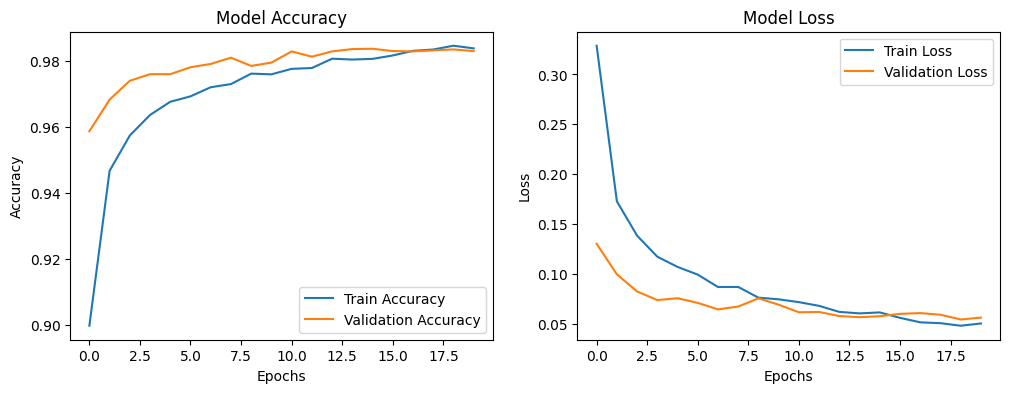

In [42]:
import matplotlib.pyplot as plt

# Plot training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()



In [43]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Test Accuracy: 0.9830
Test Loss: 0.0561


In [44]:
model.save("mnist_model.keras")  # Recommended way


In [45]:
from google.colab import drive
drive.mount('/content/drive')

model.save("/content/drive/MyDrive/mnist_model.keras")  # Save to Google Drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
